# Credit Risk Modelling Challenge

In [364]:
#Importing library for Data Analysis,visualization and scientific computing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Data Collection

In [365]:
#loading the data into a dataframe
loan=pd.read_csv('GermanCredit.csv',index_col=0)

## 2. Data Preprocessing

In [366]:
loan.head(3)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,none,...,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,none,...,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,NaN,12,critical,education,2096,24.0,5 years,2,single,none,...,49,none,own,1,0,2,NaN,yes,unskilled resident,male


In [368]:
#The dimensionality of the variables
loan.shape

(1000, 22)

In [369]:
#checking basic information of all variables in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      606 non-null    float64
 1   months_loan_duration  1000 non-null   int64  
 2   credit_history        1000 non-null   object 
 3   purpose               1000 non-null   object 
 4   amount                1000 non-null   int64  
 5   savings_balance       817 non-null    float64
 6   employment_length     938 non-null    object 
 7   installment_rate      1000 non-null   int64  
 8   personal_status       690 non-null    object 
 9   other_debtors         1000 non-null   object 
 10  residence_history     870 non-null    object 
 11  property              1000 non-null   object 
 12  age                   1000 non-null   int64  
 13  installment_plan      1000 non-null   object 
 14  housing               1000 non-null   object 
 15  existing_credits      

In [370]:
#checking distribution of the data
loan.describe()

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents,telephone
count,606.000000,1000.000000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,4.040000e+02
mean,97.245875,20.903000,3271.258000,781.570379,2.973000,35.546000,1.407000,0.300000,1.155000,2.344914e+09
std,206.923583,12.058814,2822.736876,3016.983785,1.118715,11.375469,0.577654,0.458487,0.362086,3.008193e+06
min,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,2.340000e+09
25%,-23.000000,12.000000,1365.500000,31.000000,2.000000,27.000000,1.000000,0.000000,1.000000,2.342211e+09
50%,24.000000,18.000000,2319.500000,64.000000,3.000000,33.000000,1.000000,0.000000,1.000000,2.344804e+09
75%,131.750000,24.000000,3972.250000,128.000000,4.000000,42.000000,2.000000,1.000000,1.000000,2.347731e+09
max,999.000000,72.000000,18424.000000,19972.000000,4.000000,75.000000,4.000000,1.000000,2.000000,2.349994e+09


In [371]:
#Checking values in the categorical columns
for i in loan.select_dtypes('object').columns:
    print(f"{i}: {loan[i].unique()}")

credit_history: ['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']
purpose: ['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']
employment_length: ['13 years' '2 years' '5 years' '3 years' '11 years' '4 years' nan
 '6 months' '5 months' '16 years' '1 years' '17 years' '3 months'
 '9 years' '4 months' '10 years' '10 months' '1 months' '7 months'
 '19 years' '7 years' '14 years' '18 years' '0 months' '15 years'
 '9 months' '6 years' '8 years' '12 years' '11 months' '2 months'
 '8 months']
personal_status: ['single' nan 'divorced' 'married']
other_debtors: ['none' 'guarantor' 'co-applicant']
residence_history: ['6 years' '5 months' '4 years' '13 years' '8 years' '12 years' '3 months'
 '24 years' '10 months' nan '10 years' '19 years' '0 months' '7 years'
 '3 years' '8 months' '7 months' '14 years' '1 years' '16 years'
 '6 months' '2 years' '20 years' '11 months' '21 years' '5 years'
 '9 months'

### B.Dealing with missing values

In [372]:
#checking for missing values
loan.isnull().sum().sort_values(ascending=False)[:7]

telephone            596
checking_balance     394
personal_status      310
savings_balance      183
residence_history    130
employment_length     62
installment_plan       0
dtype: int64

In [375]:
#Correlatio between variables
loan.corr()['default'].sort_values(ascending=False)

default                 1.000000
months_loan_duration    0.214927
amount                  0.154739
installment_rate        0.072404
telephone               0.059624
dependents             -0.003015
existing_credits       -0.045732
age                    -0.091127
savings_balance        -0.097332
checking_balance       -0.147594
Name: default, dtype: float64

In [376]:
loan.residence_history.mode()

0    2 years
Name: residence_history, dtype: object

In [377]:
#Checking columns left with missing values
loan.isnull().sum().sort_values(ascending=False)

telephone               596
checking_balance        394
personal_status         310
savings_balance         183
residence_history       130
employment_length        62
installment_plan          0
job                       0
foreign_worker            0
dependents                0
default                   0
existing_credits          0
housing                   0
property                  0
age                       0
months_loan_duration      0
other_debtors             0
installment_rate          0
amount                    0
purpose                   0
credit_history            0
gender                    0
dtype: int64

In [378]:
#The telephone column would be dropped becauase it doesn't have relevance to the model
loan.drop('telephone',axis=1,inplace=True)

In [379]:
loan.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'foreign_worker', 'job', 'gender'],
      dtype='object')

In [380]:
#filling missing values in some columns
loan.personal_status.fillna(loan.personal_status.mode()[0],inplace=True)
loan['credit_history'].fillna(loan['credit_history'].mode()[0])
loan['checking_balance']=loan.checking_balance.fillna(loan.checking_balance.mean())
loan.loc[loan['residence_history'].isna(),'residence_history']=loan.residence_history.mode()[0]
loan['savings_balance'].fillna(loan.savings_balance.mean(),inplace=True)
loan['employment_length'].loc[loan['employment_length'].isna()]=loan['employment_length'].mode()[0]
loan.loc[loan['savings_balance'].isna(), 'savings_balance'] = loan['savings_balance'].mean()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_10008\3782244508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['employment_length'].loc[loan['employment_length'].isna()]=loan['employment_length'].mode()[0]


In [381]:
loan.checking_balance.isnull().sum()

0

In [383]:
loan.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
foreign_worker          0
job                     0
gender                  0
dtype: int64

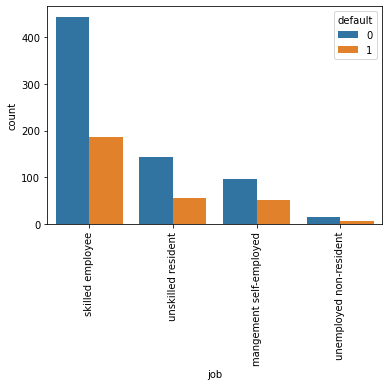

In [384]:
sns.countplot(x='job',hue='default',data=loan)
plt.xticks(rotation=90);

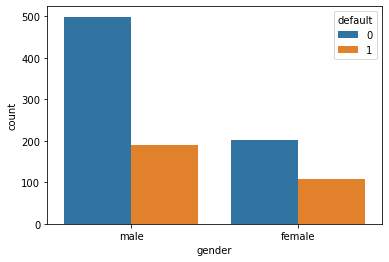

In [385]:
sns.countplot(x='gender',hue='default',data=loan);

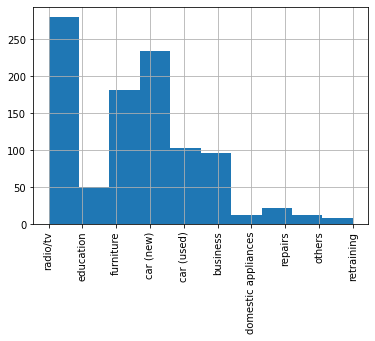

In [386]:
loan['purpose'].hist()
plt.xticks(rotation=90);

#### c.Dealing with the Categorical Varaibles

In [387]:
#Categorical variables
loan.select_dtypes('object').columns

Index(['credit_history', 'purpose', 'employment_length', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'installment_plan',
       'housing', 'foreign_worker', 'job', 'gender'],
      dtype='object')

In [388]:
#Changing employment length to numerical column years and months into years by dividing by 12
loan.loc[loan['employment_length'].str.contains('months').fillna(False), 'employment_length'] = loan.loc[loan['employment_length'].str.contains('months').fillna(False), 'employment_length'].str.split(' ').str[0].astype(float) / 12

loan.loc[loan['employment_length'].str.contains('years').fillna(False), 'employment_length'] = loan.loc[loan['employment_length'].str.contains('years').fillna(False), 'employment_length'].str.split(' ').str[0].astype(float)


In [389]:
#verifying that it has worked
loan.employment_length.unique()

array([13.0, 2.0, 5.0, 3.0, 11.0, 4.0, 1.0, 0.5, 0.4166666666666667, 16.0,
       17.0, 0.25, 9.0, 0.3333333333333333, 10.0, 0.8333333333333334,
       0.08333333333333333, 0.5833333333333334, 19.0, 7.0, 14.0, 18.0,
       0.0, 15.0, 0.75, 6.0, 8.0, 12.0, 0.9166666666666666,
       0.16666666666666666, 0.6666666666666666], dtype=object)

In [390]:
#Filling those with 0 months now nan values with 0
loan.employment_length.fillna(0,inplace=True)

In [391]:
#checking the categorical variables left
loan.select_dtypes('object').columns

Index(['credit_history', 'purpose', 'personal_status', 'other_debtors',
       'residence_history', 'property', 'installment_plan', 'housing',
       'foreign_worker', 'job', 'gender'],
      dtype='object')

In [392]:
#values in the categorical variable
for i in loan.select_dtypes('object').columns:
    print(f"{i}: {loan[i].unique()}")

credit_history: ['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']
purpose: ['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']
personal_status: ['single' 'divorced' 'married']
other_debtors: ['none' 'guarantor' 'co-applicant']
residence_history: ['6 years' '5 months' '4 years' '13 years' '8 years' '12 years' '3 months'
 '24 years' '10 months' '2 years' '10 years' '19 years' '0 months'
 '7 years' '3 years' '8 months' '7 months' '14 years' '1 years' '16 years'
 '6 months' '20 years' '11 months' '21 years' '5 years' '9 months'
 '2 months' '15 years' '11 years' '18 years' '22 years' '23 years'
 '1 months' '9 years' '4 months' '17 years']
property: ['real estate' 'building society savings' 'unknown/none' 'other']
installment_plan: ['none' 'bank' 'stores']
housing: ['own' 'for free' 'rent']
foreign_worker: ['yes' 'no']
job: ['skilled employee' 'unskilled resident' 'mangement self-employed'
 'une

In [393]:
#Turning Categorical to numerical variables suitable for ML model
loan['gender']=loan['gender'].map({'male':1,'female':0})
loan['foreign_worker']=loan['foreign_worker'].map({'yes':1,'no':0})
loan['installment_plan']=loan['installment_plan'].map({'bank':1,'none':0,'stores':2})
loan['housing']=loan['housing'].map({'own':1,'for free':0,'rent':2})
loan['other_debtors']=loan['other_debtors'].map({'none':0, 'guarantor':1, 'co-applicant':2})
loan['personal_status']=loan['personal_status'].map({'single':0, 'divorced':1, 'married':2})

In [394]:
for i in loan.select_dtypes('object').columns:
    print(f"{i}: {loan[i].unique()}")

credit_history: ['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']
purpose: ['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']
residence_history: ['6 years' '5 months' '4 years' '13 years' '8 years' '12 years' '3 months'
 '24 years' '10 months' '2 years' '10 years' '19 years' '0 months'
 '7 years' '3 years' '8 months' '7 months' '14 years' '1 years' '16 years'
 '6 months' '20 years' '11 months' '21 years' '5 years' '9 months'
 '2 months' '15 years' '11 years' '18 years' '22 years' '23 years'
 '1 months' '9 years' '4 months' '17 years']
property: ['real estate' 'building society savings' 'unknown/none' 'other']
job: ['skilled employee' 'unskilled resident' 'mangement self-employed'
 'unemployed non-resident']


In [395]:
#dropping irrelevant column that won't be too relevant to the model
loan.drop('residence_history',axis=1,inplace=True)

In [396]:
#One hot encoding
loanforml=pd.get_dummies(loan)

In [397]:
loanforml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   checking_balance                       1000 non-null   float64
 1   months_loan_duration                   1000 non-null   int64  
 2   amount                                 1000 non-null   int64  
 3   savings_balance                        1000 non-null   float64
 4   employment_length                      1000 non-null   float64
 5   installment_rate                       1000 non-null   int64  
 6   personal_status                        1000 non-null   int64  
 7   other_debtors                          1000 non-null   int64  
 8   age                                    1000 non-null   int64  
 9   installment_plan                       1000 non-null   int64  
 10  housing                                1000 non-null   int64  
 11  exist

In [398]:
#spliting the dataset into X and y
X=loanforml.drop('default',axis=1)
y=loan.default

In [399]:
#confirming there are no more null values
X.isnull().sum()

checking_balance                         0
months_loan_duration                     0
amount                                   0
savings_balance                          0
employment_length                        0
installment_rate                         0
personal_status                          0
other_debtors                            0
age                                      0
installment_plan                         0
housing                                  0
existing_credits                         0
dependents                               0
foreign_worker                           0
gender                                   0
credit_history_critical                  0
credit_history_delayed                   0
credit_history_fully repaid              0
credit_history_fully repaid this bank    0
credit_history_repaid                    0
purpose_business                         0
purpose_car (new)                        0
purpose_car (used)                       0
purpose_dom

In [400]:
#importing train test split
from sklearn.model_selection import train_test_split

In [401]:
#spliting model into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [402]:
#IMPORTING MACHINE LEARNING LIBRARIES
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

##### MODEL OPTIMIZATION

In [403]:
# Defining parameters for Gradient Boosting Model
gradparam_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Initializing the Gradient Boosting model
gradientmodel = GradientBoostingClassifier()

# Performing grid search with cross-validation
grid_search = GridSearchCV(gradientmodel, gradparam_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.7529999999999999


In [404]:
# # Defining parameters for XGBoost Model
xgbparam_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initializing the XGBoost model
xgbmodel = xgb.XGBClassifier()

# Performing grid search with cross-validation
grid_search = GridSearchCV(xgbmodel, xgbparam_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.763


In [405]:
# Define the parameter grid for tuning
lightparam_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the LightGBM model
lightmodel = lgb.LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lightmodel, lightparam_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.7539999999999999


In [406]:
# Defining parameters for Gradient Boosting Model
randparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
randmodel = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(randmodel, randparam_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.758


In [407]:
from sklearn.metrics import accuracy_score
#Checking for the model with the best accuracy to choose from

# Dictionary with models
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200),
     'XGBClassifier': xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0),
    'lightGBMClassifier': lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8)
}

best_accuracy = 0.0
best_model_name = ''

# iterating over items in the dictionoary
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # accuracy score of the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} accuracy: {accuracy}")



GradientBoostingClassifier accuracy: 0.7454545454545455
XGBClassifier accuracy: 0.7424242424242424
lightGBMClassifier accuracy: 0.7727272727272727


In [408]:
#Using the best performing model to make predictions
model=lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [409]:
print(accuracy_score(y_test,predictions))

0.7727272727272727


In [410]:
from sklearn.metrics import confusion_matrix,classification_report

In [411]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       229
           1       0.68      0.49      0.57       101

    accuracy                           0.77       330
   macro avg       0.74      0.69      0.71       330
weighted avg       0.76      0.77      0.76       330



In [412]:
print(confusion_matrix(y_test,predictions))

[[206  23]
 [ 52  49]]
